# 공기질 데이터 분석 및 고객 리포트 기획

> 목차

- 문제상황 및 데이터 살펴보기
- 문제해결 프로세스 정의
- 과정 1 공기질 데이터 Trend 파악
- 과정 2 고객 리포트 기획을 위한 지표 정의
- 과정 3 고객 리포트 Story line 구성

In [2]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir('/content/drive/MyDrive/fastcam/Project02_공기질 데이터 분석 및 고객 리포트 기획')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/fastcam/Project02_공기질 데이터 분석 및 고객 리포트 기획'

## **문제상황 및 데이터 살펴보기**
---
```
A업체는 공기질 센서 측정기를 개발하여 판매, 경쟁사가 등장하면서 판매량이 감소하고 있는 상황

단순히 제품 판매로만 영업이익을 발생시킬 수 없다고 판단,새로운 서비스를 고객에게 제공하여 판매 촉진 목표

공기질 센서 측정기로부터 수집되는 센서 데이터를 활용, 고객에게 무상으로 '우리집 공기질 Report'제공, 타 경쟁사 대비 우위를 선점
```  

### **데이터 명세**

* 일자별 시간 단위로 공기질 측정기에서 총 13개의 센서 데이터가 수집된다.
---
|Date|Time|CO(GT)|PT08.S1(CO)|NMHC(GT)|
|:---:|:---:|:---:|:---:|:---:|
|날짜|시간|일산화탄소|산화주석|비메타닉 탄화수소|

---
|C6H6(GT)|PT08.S2(NMHC)|NOx(GT)|PT08.S3(NOx)|NO2(GT)|
|:---:|:---:|:---:|:---:|:---:|
|벤젠농도|티타니아|Nox농도|산화 텅스텐(Nox)|NO2농도|

---
|PT08.S4(NO2)|PT08.S5(O3)|T|RH|AH|
|:---:|:---:|:---:|:---:|:---:|
|산화 텅스텐(No2)|산화인듐|온도|상대습도|절대습도|

In [3]:
# Data read
import pandas as pd
df = pd.read_excel('chapter02_airquality.xlsx')
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 제품 판매량 감소, 영업이익 감소
```  

> **기대효과**

```
▶ 제품 판매량 증가, 영업이익 증가
```

> **해결방안**

```
▶ 공기질 고객 Report 제공을 통해 경쟁사 대비 차별화 서비스 제공
▶ 과정 1
 - 공기질 데이터에 대한 이해 + Time data 처리 방법
▶ 과정 2
 - Report 작성을 위한 다양한 지표 개발 
▶ 과정 3
 - 개발된 지표를 활용하여 고객 Report 개발 
```

> **성과측정**  

```
▶ Report 제공 전/후 판매량 비교, 설문조사를 통한 고객만족도 점수화
```

> **현업적용**  

```
▶ 공기질 측정기로 부터 실시간 센서 데이터 수집 및 DB 적재 시스템 구축  
▶ 수집된 센서 데이터 활용 고객 Report 대시보드 개발  
▶ 매 월 고객별 Report 출력 및 전송채널(e-mail, Kakao talk 등)을 통해 제공 
```

## 과정 1 **공기질 데이터 Trend 파악**

### Data 전처리
---
- 수집된 데이터의 기본 정보 확인
  
  (1) 데이터 형태 확인

  (2) 데이터 타입 확인

  (3) 결측값 확인

  (4) 이상값 확인

In [4]:
# 데이터 형태
print('데이터 형태', df.shape)

데이터 형태 (9357, 15)


In [5]:
# 데이터 타입
print('데이터 형태')
print()
df.info()

데이터 형태

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64

In [6]:
# 결측치 없음

# 이상치 확인
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


```
센서 데이터에서 -200인 값 확인 세밀한 데이터 확인 필요
정상적인 센서값에서 나올 수 있는 수치가 아님
```

In [7]:
df[df['T']==-200].head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,2004-04-01,14:00:00,1.7,-200.0,222,-200.0,-200.0,99.0,-200.0,72.0,-200.0,-200.0,-200.0,-200.0,-200.0
525,2004-04-01,15:00:00,1.9,-200.0,197,-200.0,-200.0,108.0,-200.0,81.0,-200.0,-200.0,-200.0,-200.0,-200.0
526,2004-04-01,16:00:00,2.3,-200.0,319,-200.0,-200.0,131.0,-200.0,93.0,-200.0,-200.0,-200.0,-200.0,-200.0
701,2004-04-08,23:00:00,2.0,-200.0,137,-200.0,-200.0,129.0,-200.0,106.0,-200.0,-200.0,-200.0,-200.0,-200.0
702,2004-04-09,00:00:00,2.4,-200.0,189,-200.0,-200.0,154.0,-200.0,109.0,-200.0,-200.0,-200.0,-200.0,-200.0


In [8]:
# 이상치를 Null 값으로 바꾼 이후 이전 센서 값으로 변경
import numpy as np

df = df.replace(-200, np.NaN)
df = df.fillna(method='ffill')

In [9]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.082195,1102.604396,270.496740,10.190299,942.422741,240.718147,832.618539,109.401453,1452.890358,1030.388426,18.315768,48.814853,1.017382
std,1.469801,219.599578,73.306853,7.565011,269.583076,206.611257,255.704654,47.210774,347.427351,410.906048,8.822898,17.354492,0.404829
min,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.000000,938.250000,275.000000,4.401596,732.500000,97.000000,654.500000,73.000000,1227.750000,726.000000,11.875000,35.425000,0.726213
50%,1.700000,1061.500000,275.000000,8.276765,910.500000,174.000000,806.750000,102.000000,1459.750000,963.750000,17.575000,48.925001,0.987539
75%,2.800000,1237.250000,275.000000,14.019301,1117.250000,318.000000,967.500000,137.000000,1676.750000,1286.500000,24.325000,61.875000,1.306671
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


### Data 전처리(시간 데이터)
---
* Time(시간) 데이터


In [10]:
# 시간 데이터가 날짜와 시간으로 나뉘어져 있기 때문에 둘을 합친 새로운 컬럼을 생성

df['Date_merge'] = df['Date'].astype('str') + ' ' + df['Time'].astype(str)
df['Date_merge'] = pd.to_datetime(df['Date_merge'])
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_merge
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00


In [11]:
# 컬럼 순서 변경
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Date_merge'],
      dtype='object')

In [12]:
df = df[['Date_merge','Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']]
df.head()       

,Date_merge,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_merge     9357 non-null   datetime64[ns]
 1   Date           9357 non-null   datetime64[ns]
 2   Time           9357 non-null   object        
 3   CO(GT)         9357 non-null   float64       
 4   PT08.S1(CO)    9357 non-null   float64       
 5   NMHC(GT)       9357 non-null   float64       
 6   C6H6(GT)       9357 non-null   float64       
 7   PT08.S2(NMHC)  9357 non-null   float64       
 8   NOx(GT)        9357 non-null   float64       
 9   PT08.S3(NOx)   9357 non-null   float64       
 10  NO2(GT)        9357 non-null   float64       
 11  PT08.S4(NO2)   9357 non-null   float64       
 12  PT08.S5(O3)    9357 non-null   float64       
 13  T              9357 non-null   float64       
 14  RH             9357 non-null   float64       
 15  AH             9357 n

### 공기질 Trend 확인
---
- 시간에 따른 센서 데이터의 Trend 변화 파악
- 온도(T), 상대습도(RH), 절대습도(AH)
- 2004-03 ~ 2005-03 1년치 데이터

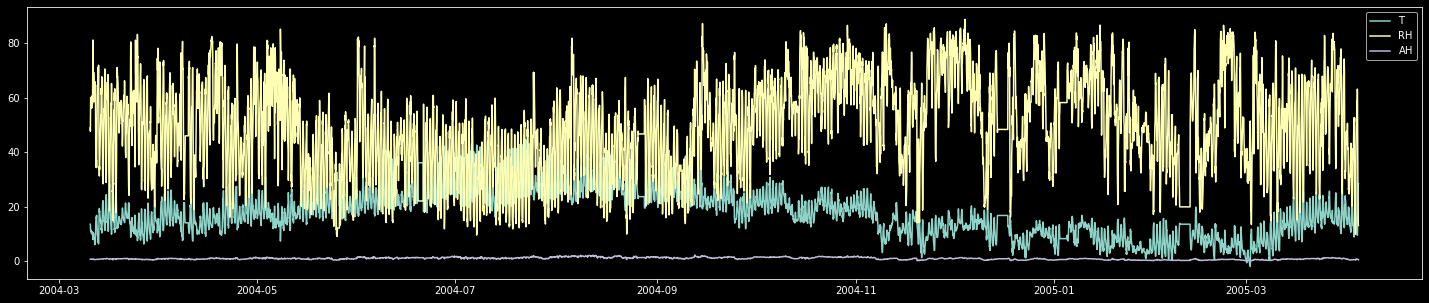

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use(['dark_background'])

plt.plot(df['Date_merge'], df['T'], label='T')
plt.plot(df['Date_merge'], df['RH'], label='RH')
plt.plot(df['Date_merge'], df['AH'], label='AH')

plt.legend()
plt.gcf().set_size_inches(25,5)

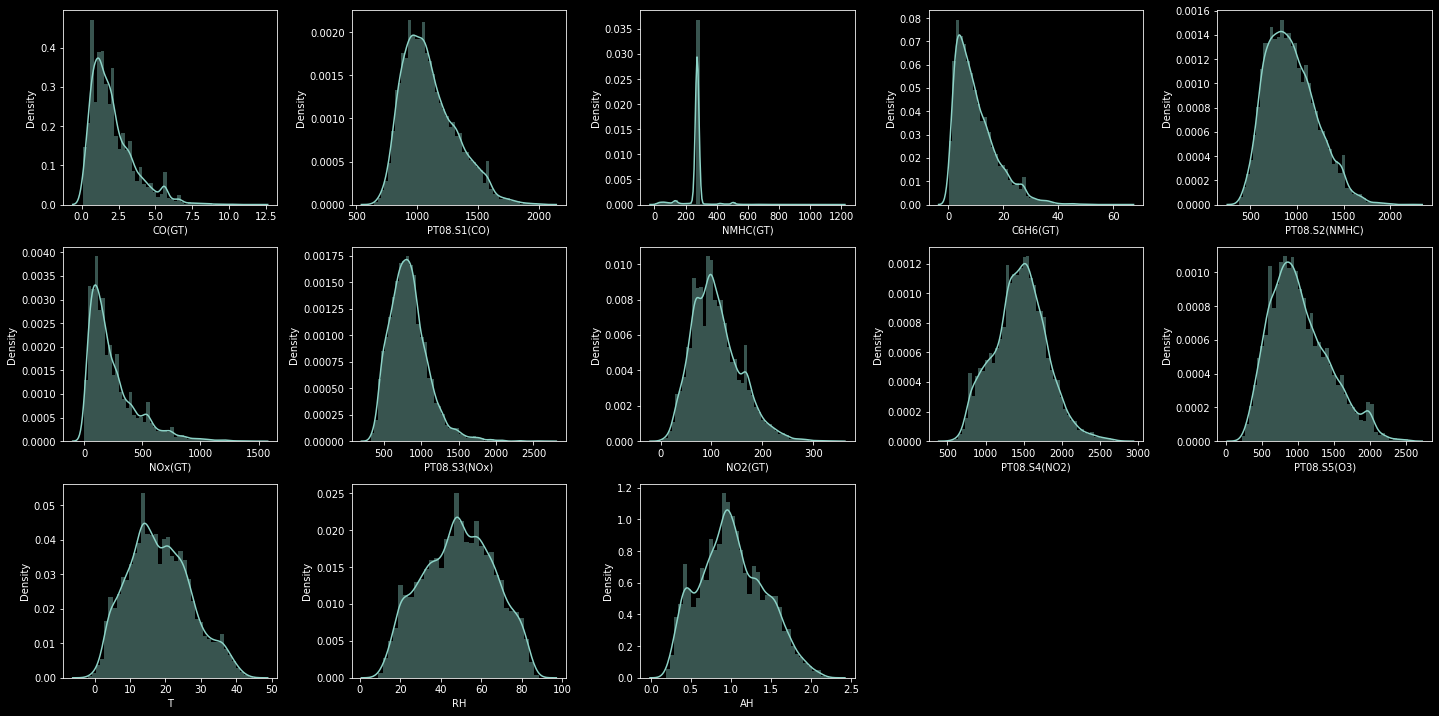

In [15]:
# 모든 센서 데이터의 분포 확인

for i in range(3,16):
  plt.subplot(3,5,i-2)
  plt.grid(False)
  sns.distplot(df.iloc[:,i])

plt.gcf().set_size_inches(20, 10)
plt.tight_layout()
plt.show()

## 과정 2 고객 리포트 기획을 위한 지표 정의

### 지표 정의 (기준치 설정)
---
* Report 기획에 필요한 지표들을 정의

In [16]:
# 센서 데이터에 대한 min/max/avg 확인

for i in range(3,16):
  print(f'{df.columns[i]} Min : {df.iloc[:,i].min()}, Max : {df.iloc[:,i].min()}, Avg : {df.iloc[:,i].mean()}')

CO(GT) Min : 0.1, Max : 0.1, Avg : 2.082195148017527
PT08.S1(CO) Min : 647.25, Max : 647.25, Avg : 1102.6043959958677
NMHC(GT) Min : 7.0, Max : 7.0, Avg : 270.4967404082505
C6H6(GT) Min : 0.14904773883376646, Max : 0.14904773883376646, Avg : 10.190298936251601
PT08.S2(NMHC) Min : 383.25, Max : 383.25, Avg : 942.4227405507462
NOx(GT) Min : 2.0, Max : 2.0, Avg : 240.71814684193654
PT08.S3(NOx) Min : 322.0, Max : 322.0, Avg : 832.6185387054255
NO2(GT) Min : 2.0, Max : 2.0, Avg : 109.40145345730468
PT08.S4(NO2) Min : 551.0, Max : 551.0, Avg : 1452.8903583769725
PT08.S5(O3) Min : 221.0, Max : 221.0, Avg : 1030.3884257774928
T Min : -1.8999999761581, Max : -1.8999999761581, Avg : 18.315768049064744
RH Min : 9.1750001907349, Max : 9.1750001907349, Avg : 48.814852540627456
AH Min : 0.1846790209991702, Max : 0.1846790209991702, Avg : 1.017381945032572


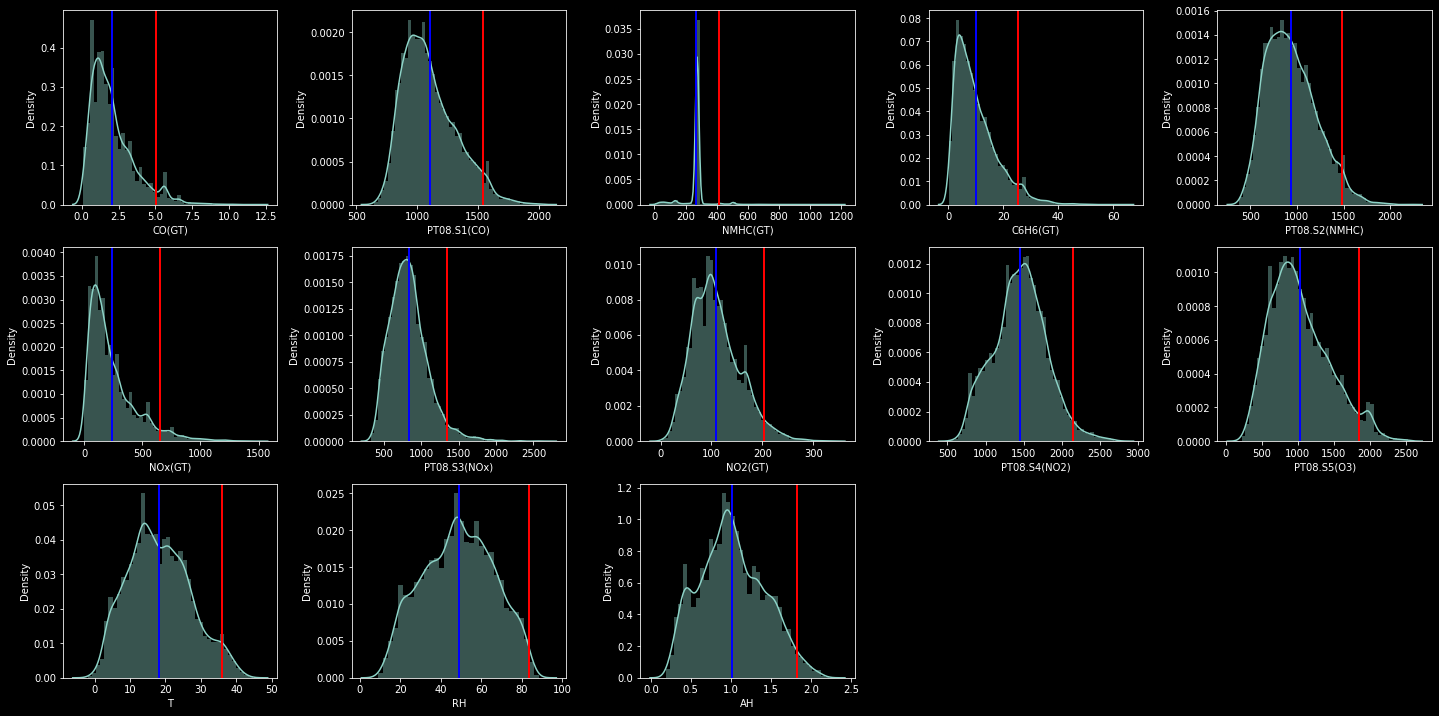

In [17]:
# 센서 데이터의 기준치 설정
# T, RH, AH를 제외한 센서값(유해물질)에 대해서 각 센서값의 평균 대비 +2sd 이상일 경우 기준치 초과를 적용
# 파란선:평균, 빨간선:이상치 기준

for i in range(3,16):
    plt.subplot(3,5,i-2)
    plt.grid(False)
    sns.distplot(df.iloc[:,i])
    plt.axvline(df.iloc[:,i].mean(), color='b', linewidth=2)
    plt.axvline(df.iloc[:,i].mean() + 2*df.iloc[:,i].std(), color='r', linewidth=2)

plt.gcf().set_size_inches(20, 10)
plt.tight_layout()
plt.show();

### 지표 정의(취약 시간대 탐색)
---
- Report 기획에 필요한 지표 정의

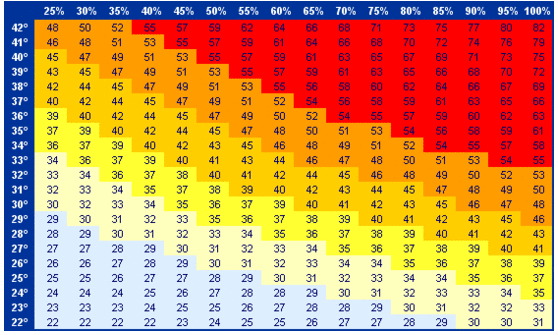

In [18]:
from IPython.display import Image
Image("img1.PNG")

In [19]:
# 온도 취약 기준 : 35도 초과
T_con = df['T'] > 35

# 습도 취약 기준 : 60% 초과
RH_con = df['RH'] > 60

In [20]:
# 온도 취약 시간대 탐색 - 일(Day)
df[T_con]['Date'].value_counts().head()

2004-06-20    24
2004-06-19    11
2004-07-21     9
2004-07-22     9
2004-07-23     9
Name: Date, dtype: int64

In [21]:
# 온도 취약 시간대 탐색 - 월(Month)
df['month'] = df['Date'].astype(str).str.slice(start=0, stop=7)
df[T_con]['month'].value_counts().head()

2004-07    166
2004-08    129
2004-06    121
2004-09     28
Name: month, dtype: int64

In [22]:
# 온도 취약 시간대 탐색 - 시간(hour)
df[T_con]['Time'].value_counts().head()

16:00:00    68
15:00:00    64
17:00:00    59
13:00:00    56
14:00:00    52
Name: Time, dtype: int64

In [23]:
# 습도 취약 시간대 탐색 - 일(Day)
df[RH_con]['Date'].value_counts().head()

2004-11-28    24
2004-11-23    24
2004-12-05    24
2005-01-10    24
2004-12-04    24
Name: Date, dtype: int64

In [24]:
# 습도 취약 시간대 탐색 - 월(month)
df[RH_con]['month'].value_counts().head()

2004-10    446
2004-11    366
2004-12    335
2005-01    291
2005-03    254
Name: month, dtype: int64

In [25]:
# 습도 취약 시간대 탐색 - 시간(hour)
df[RH_con]['Time'].value_counts().head()

06:00:00    203
05:00:00    199
04:00:00    197
07:00:00    196
03:00:00    181
Name: Time, dtype: int64

### 지표 정의(상쾌 시간대 탐색)
---
- Report 기획에 필요한 지표 정의

In [26]:
# 온도 25~27 / 습도 35~40, 상쾌 구간 정의

t_con = (df['T'] >= 25) & (df['T'] <= 27)
rh_con = (df['RH'] >= 35) & (df['RH'] <= 40)

df_good = df[t_con&rh_con]

In [27]:
df_good.head()

,Date_merge,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,month
1077,2004-04-24 15:00:00,2004-04-24,15:00:00,1.7,1222.50,192.0,8.953194,937.50,91.0,883.50,89.0,1610.00,879.50,25.550000,36.049999,1.162886,2004-04
1609,2004-05-16 19:00:00,2004-05-16,19:00:00,2.7,1403.25,275.0,15.060586,1150.50,147.0,747.00,125.0,1820.25,1124.75,25.475000,37.350000,1.199513,2004-05
1751,2004-05-22 17:00:00,2004-05-22,17:00:00,2.8,1466.25,275.0,15.807518,1173.75,152.0,680.00,115.0,1964.75,1301.50,25.450000,39.825000,1.277117,2004-05
1777,2004-05-23 19:00:00,2004-05-23,19:00:00,1.1,1085.25,275.0,5.849489,804.75,69.0,972.25,65.0,1528.25,717.75,25.275001,36.275000,1.151340,2004-05
2081,2004-06-05 11:00:00,2004-06-05,11:00:00,1.1,883.00,275.0,5.287938,777.75,61.0,1129.50,57.0,1544.50,607.50,25.875000,36.900000,1.213267,2004-06


In [28]:
df_good['T'].mean(), df_good['RH'].mean()

(25.843192474383184, 36.9990611344995)

In [29]:
# 상쾌 Date
df_good['Date'].value_counts().head()

2004-09-08    9
2004-09-05    4
2004-09-06    4
2004-07-08    3
2004-06-14    3
Name: Date, dtype: int64

In [30]:
# 상쾌 month
df_good['month'].value_counts().head()

2004-09    25
2004-06    17
2004-07    15
2004-08     9
2004-05     3
Name: month, dtype: int64

In [31]:
# 상쾌 Time
df_good['Time'].value_counts().head()

09:00:00    10
22:00:00     9
21:00:00     5
07:00:00     5
19:00:00     5
Name: Time, dtype: int64

### 지표 정의(환기 시간대 탐색)
---
- Report 기획에 필요한 지표 정의

In [33]:
df.head()

,Date_merge,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,month
0,2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03
1,2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03
2,2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03
3,2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03
4,2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03


In [36]:
# 일산화탄소 CO(GT)가 평균보다 +2sd 이상이면 기준치 초과 영역
# 기준치 초과 시 환기 필요

co_cond = df['CO(GT)'] > df['CO(GT)'].mean() + 2*df['CO(GT)'].std()

df_co = df[co_cond]['Time'].value_counts()
df_co.head()

19:00:00    77
20:00:00    59
18:00:00    56
09:00:00    44
17:00:00    31
Name: Time, dtype: int64

In [37]:
df_co = pd.DataFrame(df_co).reset_index()
df_co.columns = ['Time', 'CO(GT)']
df_co.head()

,Time,CO(GT)
0,19:00:00,77
1,20:00:00,59
2,18:00:00,56
3,09:00:00,44
4,17:00:00,31


In [38]:
# Time data 변환
df_co = df_co.sort_values(by=['Time'])
df_co['Time'] = pd.to_datetime(df_co['Time'].astype(str))
df_co = df_co.reset_index(drop=True)

In [39]:
df_co.head()

,Time,CO(GT)
0,2023-02-19 00:00:00,9
1,2023-02-19 01:00:00,8
2,2023-02-19 02:00:00,8
3,2023-02-19 03:00:00,8
4,2023-02-19 04:00:00,8


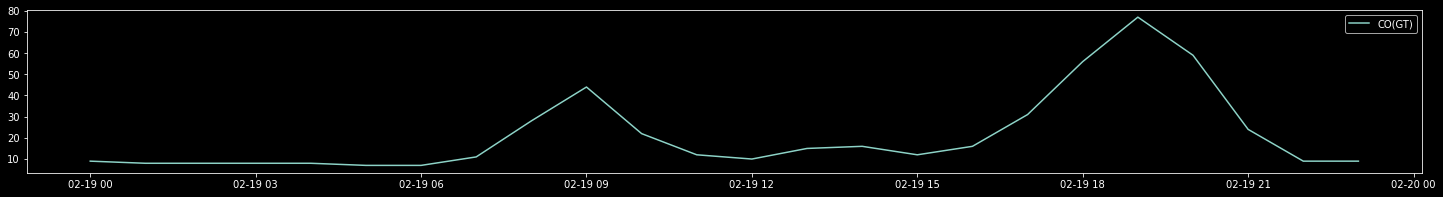

In [40]:
plt.plot(df_co['Time'], df_co['CO(GT)'], label='CO(GT)')
plt.legend()
plt.gcf().set_size_inches(25, 3)

```
오전 9시, 오후 6시 ~ 20시에서 CO(GT) peak 시간 확인
```

## 과정3 고객 리포트 Story line 구성

### 목차 선정
---
- Report의 목적 및 Contents 설계
- 과정2에서 생성한 지표를 활용하여 Report 작성

[Report 목차]
```
고객이 공기질 리포트를 받았을 때, 현재 우리집 공기질이 어떠한지 요약하고 상쾌한 날과 불쾌한 날에 대해 인지하고
패턴 분석을 통해 적절한 환기 시간을 알려주어 상쾌한 날이 더 많아질 수 있도록 하는 것
```

(1) 우리집 공기질 현황
 - 온/습도 모니터링
 - 유해물질 기준치 초과 횟수 (※ 시간 단위)

(2) 상쾌한 날과 불쾌한 날 횟수 
 - 1년 중 상쾌한 날 횟수, 상쾌한 달 
 - 1년 중 불쾌한 날 횟수, 불쾌한 달  

  (※ 상쾌 : 평균 온도 22-26℃, 평균 습도 30-40% / 불쾌 : 평균 온도 26℃ 이상, 평균 습도 50% 이상)

(3) 불쾌한 시간 상세 분석
 - 불쾌 시간대 현황
 - 환기 시간대 추천 

#### (1) 우리집 공기질 현황
---
 * 온/습도 모니터링
 * 유해물질 기준치 초과 횟수 (※ 시간 단위)


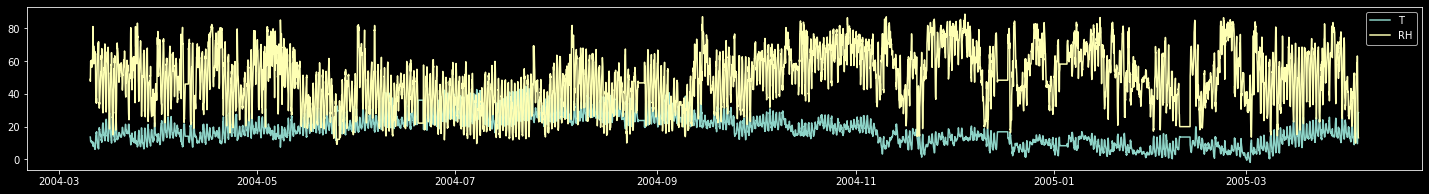

In [41]:
# 위의 데이터 df를 우리집의 1년동안의 온도와 습도 예시 데이터로 사용

plt.style.use(['dark_background'])
plt.plot(df['Date_merge'], df['T'], label='T')
plt.plot(df['Date_merge'], df['RH'], label='RH')
plt.legend()
plt.gcf().set_size_inches(25, 3)

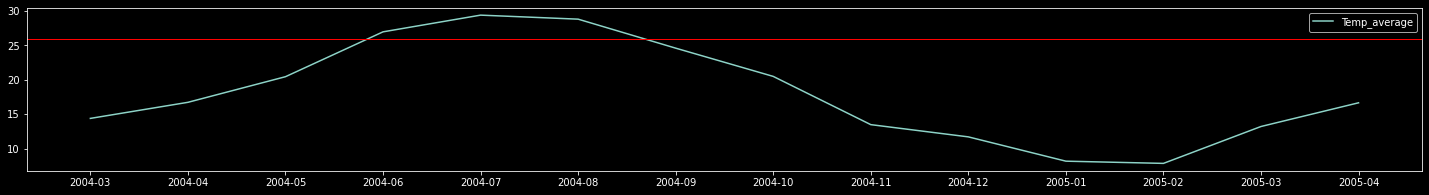

In [44]:
# 월별 평균 온도
plt.plot(pd.DataFrame(df['T'].groupby(df['month']).mean()), label = "Temp_average")
plt.axhline(26, color='r', linewidth=1)
plt.legend()
plt.gcf().set_size_inches(25,3)

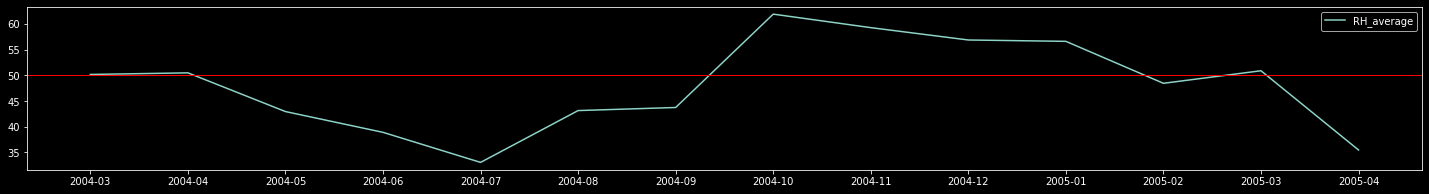

In [45]:
# 월별 평균 습도
plt.plot(pd.DataFrame(df['RH'].groupby(df['month']).mean()), label = "RH_average")
plt.axhline(50, color='r', linewidth=1)
plt.legend()
plt.gcf().set_size_inches(25,3)

In [46]:
# 유해물질 기준치 초과 횟수
for i in range(3,13):
  print(df.columns[i],":", round(len(df[df.iloc[:,i] > df.iloc[:,i].mean() + 2*df.iloc[:,i].std()]) / 24,0), "days")

CO(GT) : 21.0 days
PT08.S1(CO) : 17.0 days
NMHC(GT) : 12.0 days
C6H6(GT) : 20.0 days
PT08.S2(NMHC) : 16.0 days
NOx(GT) : 21.0 days
PT08.S3(NOx) : 14.0 days
NO2(GT) : 15.0 days
PT08.S4(NO2) : 10.0 days
PT08.S5(O3) : 18.0 days


#### (2) 상쾌한 날과 불쾌한 날
---
 * 1년 중 상쾌한 날 횟수, 상쾌한 달 
 * 1년 중 불쾌한 날 횟수, 불쾌한 달  
 (※ 상쾌 : 평균 온도 22-26℃, 평균 습도 30-40% / 불쾌 : 평균 온도 26℃ 이상, 평균 습도 50% 이상)




In [47]:
# 일별 평균 온/습도로 새로운 DataFrame 생성
df_good_bad = pd.DataFrame({'Date':df['Date'].unique(),
                            'T_D':list(df['T'].groupby(df['Date']).mean()),
                            'RH_D':list(df['RH'].groupby(df['Date']).mean())})

df_good_bad.head()

,Date,T_D,RH_D
0,2004-03-10,12.020833,54.883334
1,2004-03-11,9.833333,64.069791
2,2004-03-12,11.292708,51.107292
3,2004-03-13,12.866319,51.530903
4,2004-03-14,16.016667,48.843750


In [49]:
# 상쾌한 날

cond1 = (df_good_bad['T_D'] >= 22 ) & (df_good_bad['T_D'] <= 26)
cond2 = (df_good_bad['RH_D'] >= 30 ) & (df_good_bad['RH_D'] <= 40)

df_good_bad[cond1 & cond2]

,Date,T_D,RH_D
67,2004-05-16,22.359375,34.831250
69,2004-05-18,23.740972,30.984722
70,2004-05-19,22.989583,37.689583
71,2004-05-20,23.642361,37.434375
72,2004-05-21,23.471875,34.728125
78,2004-05-27,22.863542,32.075000
81,2004-05-30,23.715625,31.282292
86,2004-06-04,23.394792,39.429167
89,2004-06-07,25.553125,37.701042
104,2004-06-22,25.508333,37.974653


In [51]:
print("상쾌한 날",len(df_good_bad[cond1 & cond2]),'일')

상쾌한 날 14 일


In [52]:
# 불쾌한 날

cond3 = (df_good_bad['T_D'] >= 26) & (df_good_bad['RH_D'] >= 50)
df_good_bad[cond3]

,Date,T_D,RH_D
148,2004-08-05,26.297917,56.647917
149,2004-08-06,26.483333,58.032292
151,2004-08-08,28.046181,50.145139


In [53]:
print("불쾌한 날",len(df_good_bad[cond3]),'일')

불쾌한 날 3 일


#### (3) 불쾌한 시간 상세 분석
---
 * 불쾌 시간대 현황
 * 환기 시간대 추천 



In [54]:
# 불쾌한 날 조건에 따른 데이터 필터

df_bad = df[ (df['T'] >= 26) & (df['RH'] >= 50)]['Time'].value_counts()
df_bad = pd.DataFrame(df_bad).reset_index()
df_bad.columns = ['Time', 'bad_hour']

df_bad=df_bad.sort_values(by=['Time'])
df_bad['Time']=pd.to_datetime(df_bad['Time'].astype(str))
df_bad=df_bad.reset_index(drop=True)

In [55]:
df_bad.head()

,Time,bad_hour
0,2023-02-19 00:00:00,11
1,2023-02-19 01:00:00,10
2,2023-02-19 02:00:00,6
3,2023-02-19 03:00:00,3
4,2023-02-19 04:00:00,5


In [60]:
df_bad['Time'].dt.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 15, 16, 17, 18, 19, 20,
       21, 22, 23])

```
결측치 : 10시, 12시, 13시, 14시
```

In [61]:
df_bad['Time'] = df_bad['Time'].dt.hour
df_bad

,Time,bad_hour
0,0,11
1,1,10
2,2,6
3,3,3
4,4,5
5,5,4
6,6,5
7,7,5
8,8,10
9,9,9


In [62]:
# 비어 있는 시간대 0 데이터 삽입
df_append = pd.DataFrame({"Time": [10,12,13,14],
                          "bad_hour":[0,0,0,0]})
df_append

,Time,bad_hour
0,10,0
1,12,0
2,13,0
3,14,0


In [63]:
# 데이터 합치기
df_bad1=pd.concat([df_bad, df_append], axis=0).reset_index(drop=True)
df_bad1=df_bad1.sort_values(by=['Time']).reset_index(drop=True)
df_bad1

,Time,bad_hour
0,0,11
1,1,10
2,2,6
3,3,3
4,4,5
5,5,4
6,6,5
7,7,5
8,8,10
9,9,9


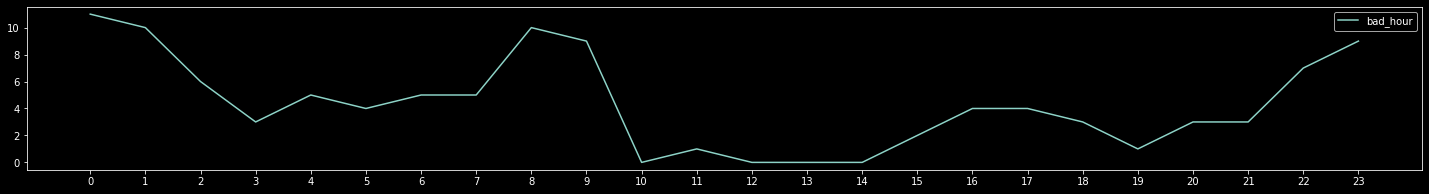

In [65]:
# 불쾌 시간대 
plt.plot(df_bad1['Time'], df_bad1['bad_hour'], label='bad_hour')
plt.xticks(df_bad1['Time'].values)
plt.legend()
plt.gcf().set_size_inches(25, 3)

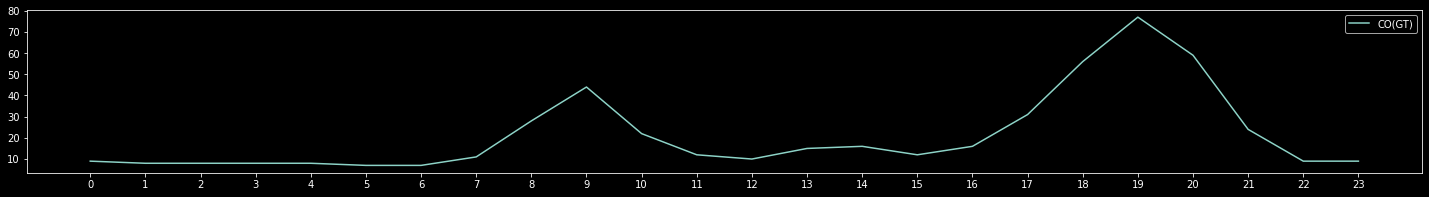

In [66]:
# 환기 추천 시간대 
plt.style.use(['dark_background'])
plt.plot(df_co['CO(GT)'], label='CO(GT)')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
plt.legend()
plt.gcf().set_size_inches(25, 3)